In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'


# Setting up automation data 
automation = pd.read_csv('raw_state_automation_data.csv', encoding='cp1252')
#removing States data 
automation.drop(automation.columns.difference(['SOC','Occupation', 'Probability']), 1, inplace=True) 
automation['Probability'] = automation['Probability'] * 100
automation

#Loading in all the job skills data
originality = pd.read_csv('Originality.csv')
negotiation = pd.read_csv('Negotiation.csv')
social_percept = pd.read_csv('Social_Perceptiveness.csv')
persuasion = pd.read_csv('Persuasion.csv')
finger_dext = pd.read_csv('Finger_Dexterity.csv')
manual_dext = pd.read_csv('Manual_Dexterity.csv')
cramped_work = pd.read_csv('Cramped_Work_Space_Awkward_Positions.csv')
fine_arts = pd.read_csv('Fine_Arts.csv')
df = pd.read_csv('Assisting_and_Caring_for_Others.csv')

#Cleaning and merging 
df['Assisting and Caring Importance'] = df['Importance']
df = df.drop(['Importance', 'Level'], axis=1)
df['Originality Importance'] = originality['Importance']
df['Negotiation Importance'] = negotiation['Importance']
df['Social Perception Importance'] = social_percept['Importance']
df['Persuasion Importance'] = persuasion['Importance']
df['Finger Dexterity Importance'] = finger_dext['Importance']
df['Manual Dexterity Importance'] = manual_dext['Importance']
df['Cramped Work Context'] = cramped_work['Context']
df['Fine Arts Importance'] = fine_arts['Importance']
df

#

,Code,Occupation,Assisting and Caring Importance,Originality Importance,Negotiation Importance,Social Perception Importance,Persuasion Importance,Finger Dexterity Importance,Manual Dexterity Importance,Cramped Work Context,Fine Arts Importance
0,29-1069.11,Sports Medicine Physicians,100,85,91,94,81,85,81,89,98
1,29-1151.00,Nurse Anesthetists,99,81,81,94,81,81,78,87,96
2,29-2099.07,Surgical Assistants,99,78,78,94,78,78,78,85,93
3,19-3031.02,Clinical Psychologists,99,78,75,88,78,78,75,84,92
4,29-1066.00,Psychiatrists,99,78,75,81,78,78,75,82,92
...,...,...,...,...,...,...,...,...,...,...,...
963,45-3021.00,Hunters and Trappers,11,16,19,28,22,6,0,0,0
964,53-6051.07,"Transportation Vehicle, Equipment and Systems ...",10,16,19,28,19,3,0,0,0
965,13-2051.00,Financial Analysts,10,16,19,28,19,3,0,0,0
966,41-9012.00,Models,7,13,17,25,19,0,0,0,0


In [2]:
#Merging the Data Sets
df['SOC'] = df['Code'].astype(str).replace('\.00', '', regex=True)
df = pd.merge(left=df, right=automation, left_on='SOC', right_on='SOC')
df.drop(['Code', 'Occupation_x'], axis=1, inplace=True)
df = df.rename(columns = {'Occupation_y':'Occupation'})
df

,Assisting and Caring Importance,Originality Importance,Negotiation Importance,Social Perception Importance,Persuasion Importance,Finger Dexterity Importance,Manual Dexterity Importance,Cramped Work Context,Fine Arts Importance,SOC,Occupation,Probability
0,98,75,72,81,75,75,75,80,87,31-1013,Psychiatric Aides,47.00
1,97,75,72,81,75,75,75,80,81,29-1081,Podiatrists,0.46
2,97,75,72,81,75,75,75,79,73,29-2061,Licensed Practical and Licensed Vocational Nurses,5.80
3,96,72,69,81,72,72,72,78,71,29-1071,Physician Assistants,14.00
4,96,72,69,78,72,72,72,77,67,29-2053,Psychiatric Technicians,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
624,12,19,19,31,22,6,0,0,0,43-9081,Proofreaders and Copy Markers,84.00
625,12,16,19,31,22,6,0,0,0,19-3011,Economists,43.00
626,11,16,19,28,22,6,0,0,0,45-3021,Hunters and Trappers,77.00
627,10,16,19,28,19,3,0,0,0,13-2051,Financial Analysts,23.00


In [3]:
df.mean()

Assisting and Caring Importance    45.772655
Originality Importance             45.052464
Negotiation Importance             40.771065
Social Perception Importance       54.050874
Persuasion Importance              44.243243
Finger Dexterity Importance        43.424483
Manual Dexterity Importance        37.372019
Cramped Work Context               24.896661
Fine Arts Importance                     inf
Probability                        54.898887
dtype: float64

In [30]:
#Creating 3 Seperate Categories Based Upon 
df['Perception_and_Manipulation'] = df[['Finger Dexterity Importance','Manual Dexterity Importance', 
                                       'Cramped Work Context']].mean(axis=1)
df['Creative_Intelligence'] = df[['Originality Importance','Fine Arts Importance']].mean(axis=1)

df['Social_Intelligence'] = df[['Social Perception Importance', 'Negotiation Importance', 
                                'Persuasion Importance', 'Assisting and Caring Importance']].mean(axis=1)



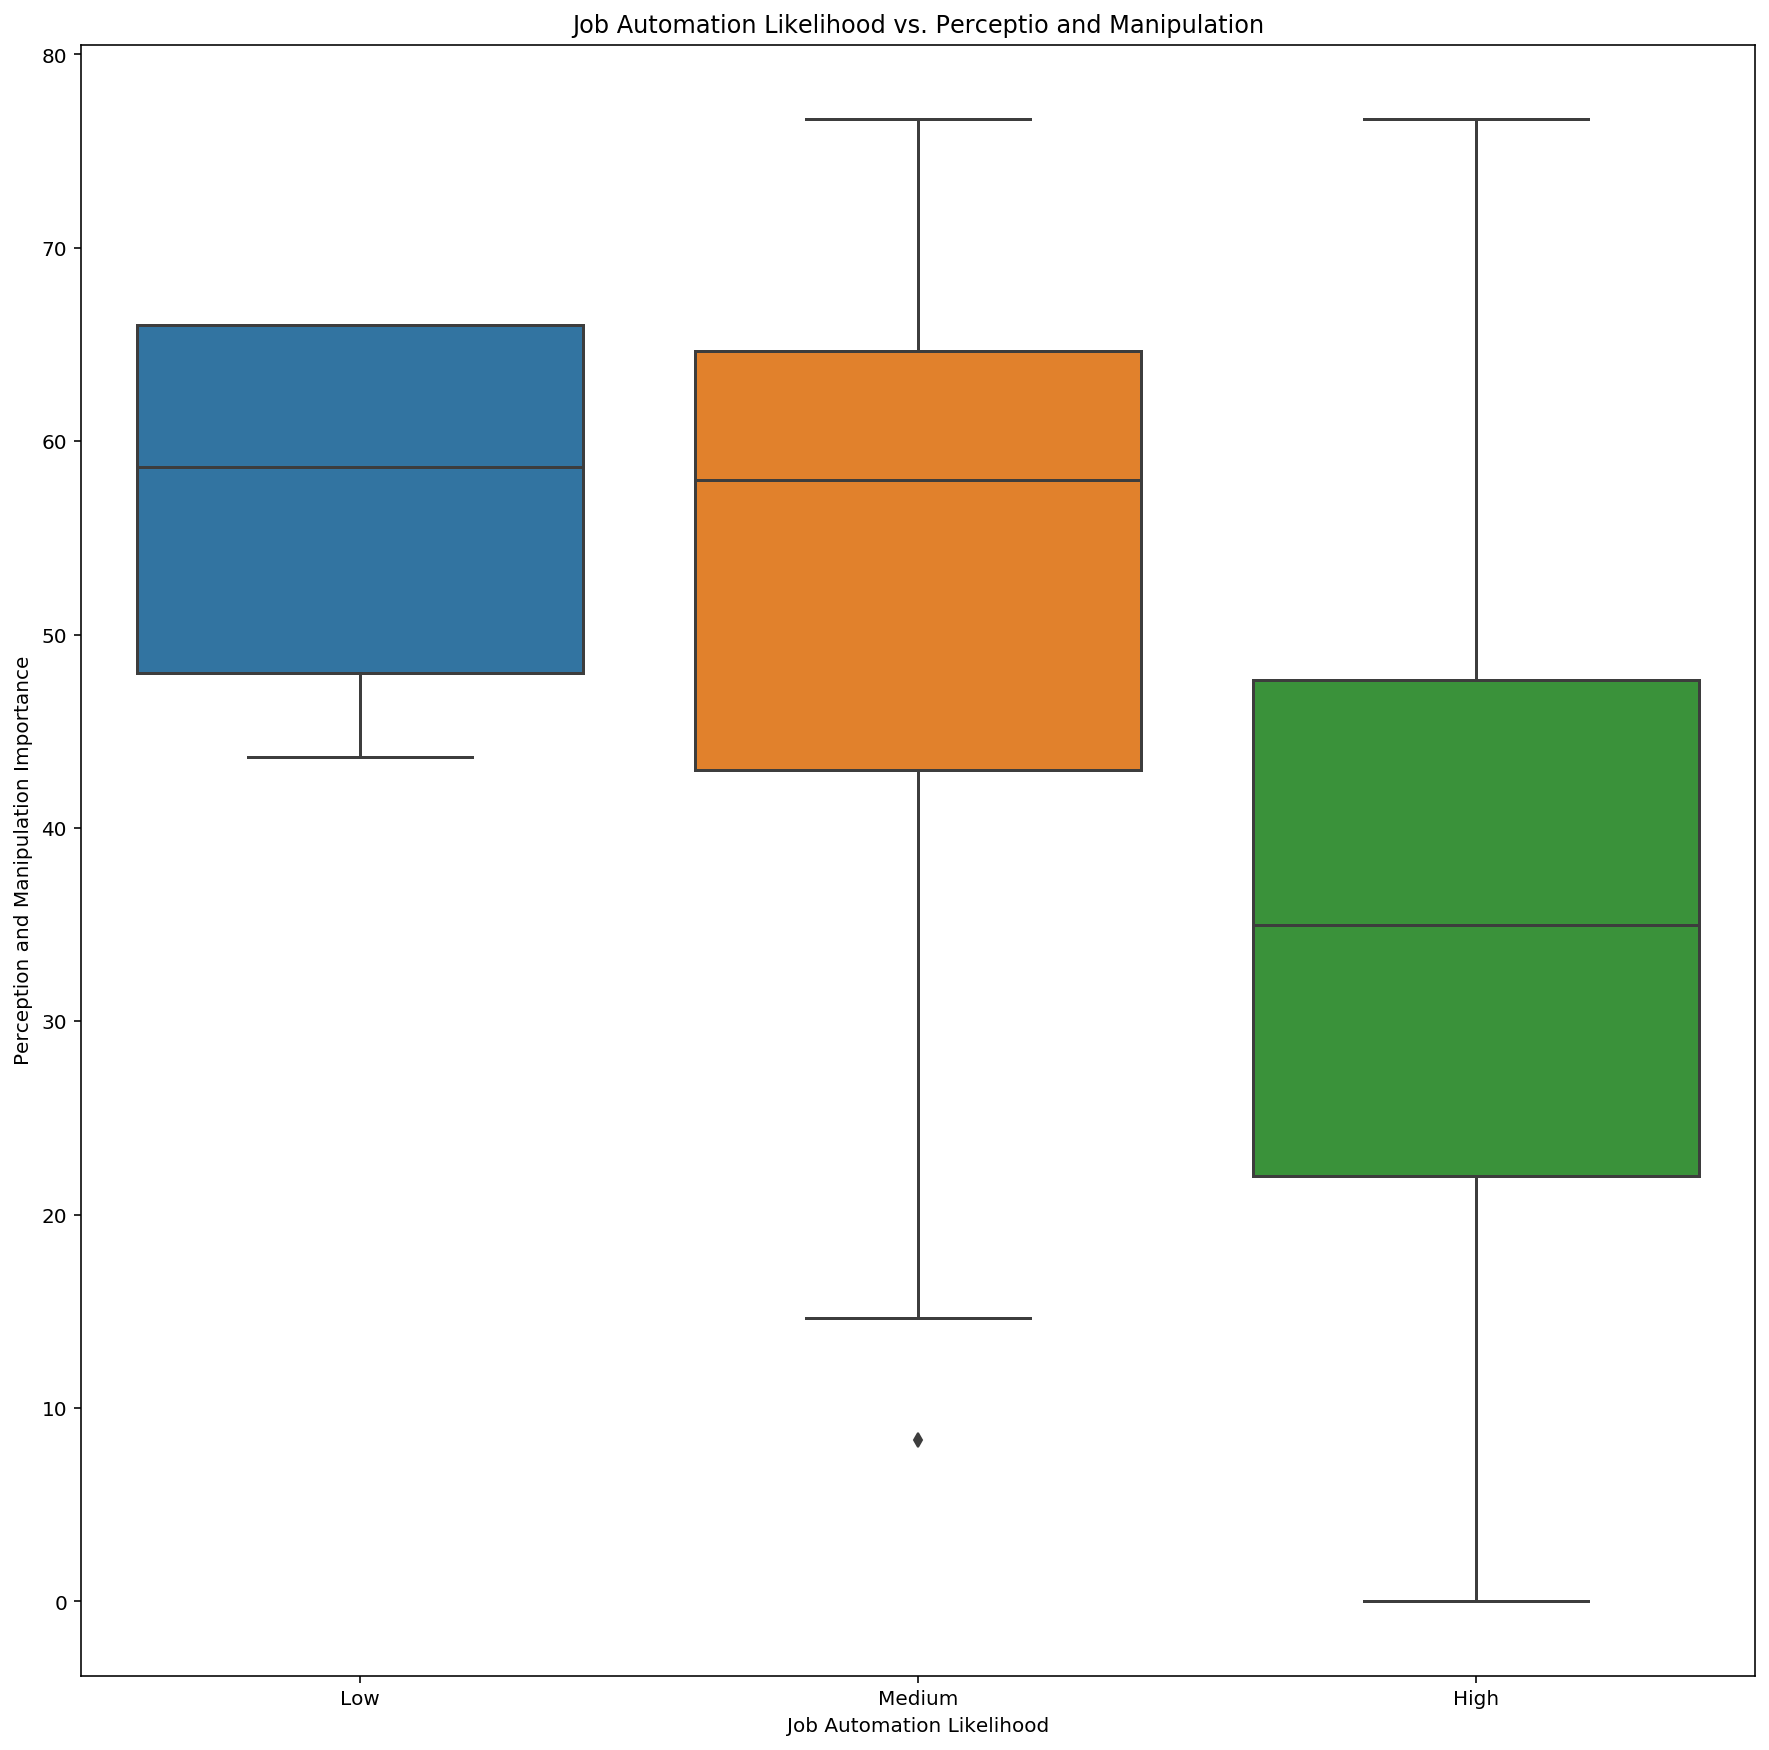

(601, 16)

In [33]:

#Perception and Manipulation 

merged_df1low = df.loc[df['Probability'] <= 0.33].assign(Location="Low")
merged_df1medium = df.loc[(df['Probability'] > 0.33) & (df['Probability'] <= 0.66)].assign(Location="Medium")
merged_df1high = df.loc[df['Probability'] > 0.66].assign(Location="High")

allValues = [merged_df1low, merged_df1medium, merged_df1high]
allMerged = pd.concat(allValues)

plt.figure(figsize=(15,15))
cdf = pd.concat([merged_df3low, merged_df3medium, merged_df3high]) 
ax = sns.boxplot(x="Location", y="Perception_and_Manipulation", data=cdf)
ax.set(title='Job Automation Likelihood vs. Perceptio and Manipulation',xlabel='Job Automation Likelihood', 
       ylabel='Perception and Manipulation Importance')

plt.show()
merged_df1high.shape

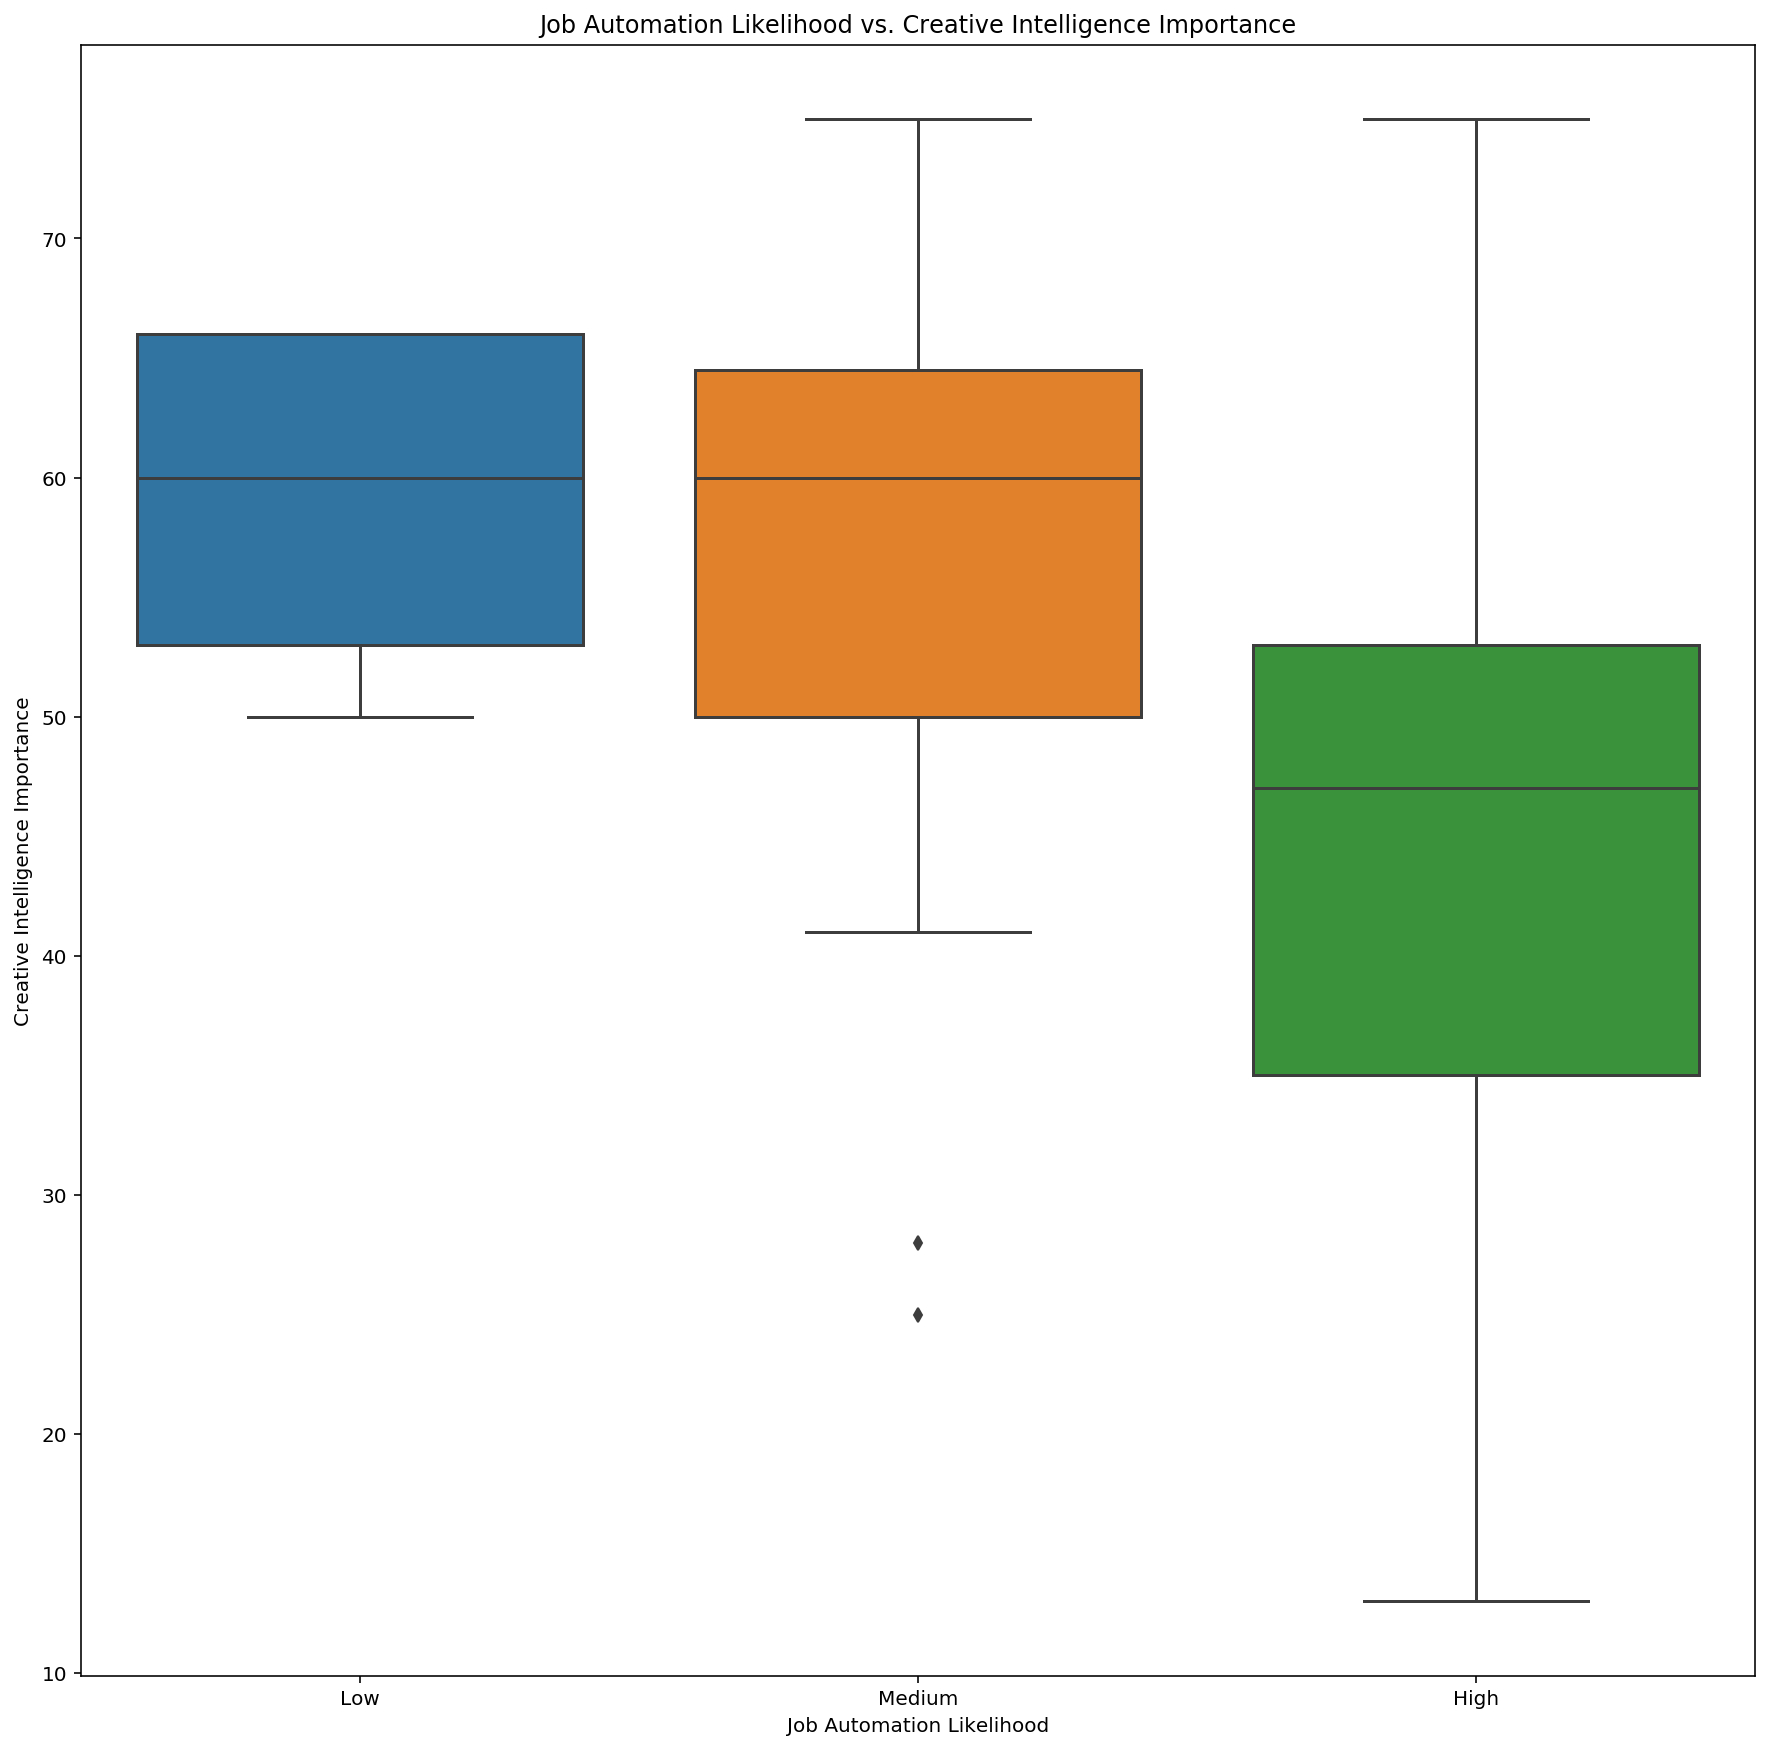

(601, 16)

In [38]:
#Creative Intelligence 

merged_df2low = df.loc[df['Probability'] <= 0.33].assign(Location="Low")
merged_df2medium = df.loc[(df['Probability'] > 0.33) & (df['Probability'] <= 0.66)].assign(Location="Medium")
merged_df2high = df.loc[df['Probability'] > 0.66].assign(Location="High")

allValues = [merged_df2low, merged_df2medium, merged_df2high]
allMerged = pd.concat(allValues)

plt.figure(figsize=(15,15))
cdf = pd.concat([merged_df2low, merged_df2medium, merged_df2high]) 
ax = sns.boxplot(x="Location", y='Creative_Intelligence', data=cdf)
ax.set(title='Job Automation Likelihood vs. Creative Intelligence Importance',xlabel='Job Automation Likelihood', 
       ylabel='Creative Intelligence Importance')

plt.show()
merged_df2high.shape

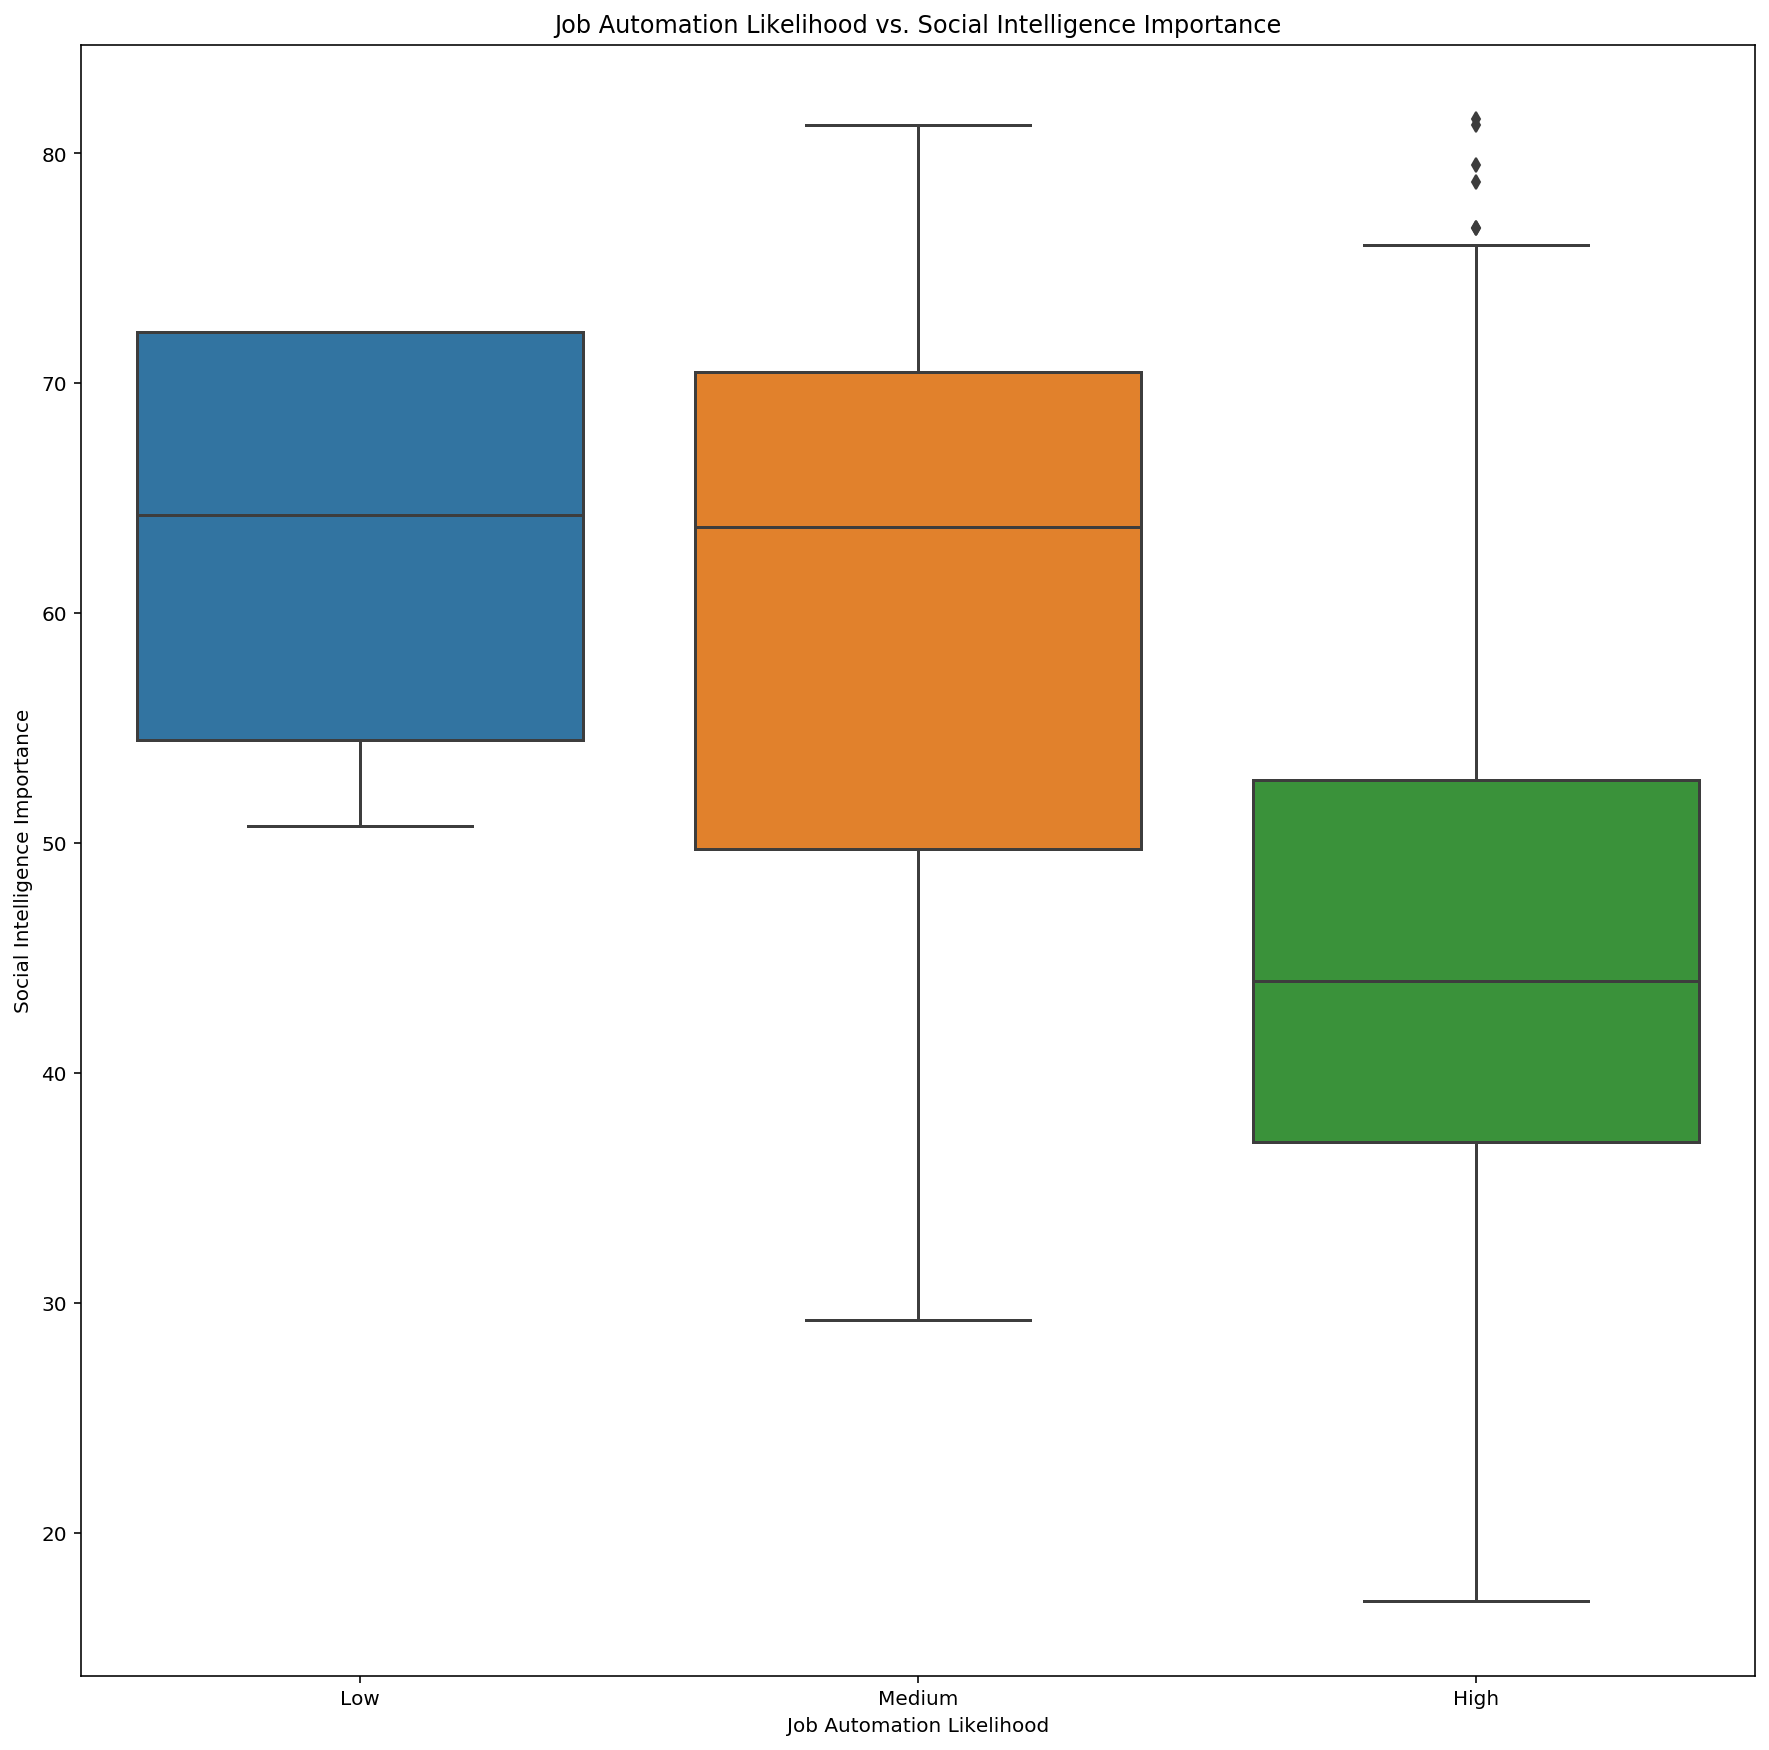

(601, 16)

In [39]:
#Social Intelligence

merged_df3low = df.loc[df['Probability'] <= 0.33].assign(Location="Low")
merged_df3medium = df.loc[(df['Probability'] > 0.33) & (df['Probability'] <= 0.66)].assign(Location="Medium")
merged_df3high = df.loc[df['Probability'] > 0.66].assign(Location="High")

allValues = [merged_df3low, merged_df3medium, merged_df3high]
allMerged = pd.concat(allValues)

plt.figure(figsize=(15,15))
cdf = pd.concat([merged_df3low, merged_df3medium, merged_df3high]) 
ax = sns.boxplot(x="Location", y="Social_Intelligence", data=cdf)
ax.set(title='Job Automation Likelihood vs. Social Intelligence Importance',xlabel='Job Automation Likelihood', 
       ylabel='Social Intelligence Importance')

plt.show()
merged_df3high.shape